# Imbalanced Data Problem

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 

X_train=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_train.csv')
y_train=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_train.csv')
X_valid=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_valid.csv')
y_valid=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_valid.csv')
X_test=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_test.csv')
y_test=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_test.csv')

In [4]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Train데이터의 불균형 비율 Bar Plot 시각화**

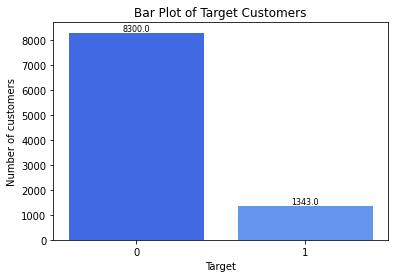

In [ ]:
import matplotlib.pyplot as plt 
xlabel=['0','1']
plt.title('Bar Plot of Target Customers')
plt.xlabel('Target')
plt.ylabel('Number of customers') 
bar=plt.bar(xlabel,y_train.value_counts(),color=['royalblue','cornflowerblue'])

for rect in bar: 
  height=rect.get_height() 
  plt.text(rect.get_x()+rect.get_width()/2.0,height,'%.1f' %height, ha='center',va='bottom',size=8)

plt.show()

In [ ]:
#데이터의 불균형 비율 

print(y_train.value_counts().iloc[0]/y_train.value_counts().iloc[-1])

6.180193596425912


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from keras.layers import Input,Dense,Reshape,Flatten,Dropout,BatchNormalization, Embedding 
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers.merge import concatenate 
from keras.models import Sequential, Model 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical 
from keras.utils.vis_utils import plot_model 
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder 
import scipy.stats 
import datetime as dt 
import pydot 
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline 

# GAN based Oversampling

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
valid=pd.concat([X_valid,y_valid],axis=1)
test=pd.concat([X_test,y_test],axis=1)

In [ ]:
data=pd.concat([train,valid,test],axis=0)

In [ ]:
data.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,target
0,8864.554143,0.003774,0.045283,0.011321,0.003774,0.0,0.018868,0.724528,0.007547,0.184906,...,1,0,0,0,0,1,3.321015,3.045777,47.647019,0
1,16049.660275,0.021322,0.038380,0.000000,0.002132,0.0,0.008529,0.869936,0.008529,0.046908,...,1,1,0,0,0,0,3.479070,0.454440,56.969353,0
2,25014.138052,0.000000,0.006757,0.000000,0.000000,0.0,0.236486,0.601351,0.081081,0.074324,...,1,0,0,0,1,0,0.070885,2.815405,47.647019,0
3,2961.172816,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,1,0,0,0,1,0,22.334630,3.926351,13.113916,1
4,424.264069,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,...,0,0,0,1,0,0,0.000000,2.964227,13.113916,1


In [ ]:
data.shape

(27553, 30)

In [ ]:
# data.csv 파일로 GAN oversampling 적용 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27553 entries, 0 to 8265
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   buy_std          27553 non-null  float64
 1   대대분류_Baby        27553 non-null  float64
 2   대대분류_Beauty      27553 non-null  float64
 3   대대분류_Culture     27553 non-null  float64
 4   대대분류_Electronic  27553 non-null  float64
 5   대대분류_Etc         27553 non-null  float64
 6   대대분류_Fashion     27553 non-null  float64
 7   대대분류_Food        27553 non-null  float64
 8   대대분류_Health      27553 non-null  float64
 9   대대분류_Home        27553 non-null  float64
 10  대대분류_Pet         27553 non-null  float64
 11  대대분류_Travel      27553 non-null  float64
 12  RedDay           27553 non-null  float64
 13  TD_Midnight      27553 non-null  float64
 14  TD_Daybreak      27553 non-null  float64
 15  TD_Morning       27553 non-null  float64
 16  TD_Midday        27553 non-null  float64
 17  TD_Twilight  

In [ ]:
data.columns

Index(['buy_std', '대대분류_Baby', '대대분류_Beauty', '대대분류_Culture',
       '대대분류_Electronic', '대대분류_Etc', '대대분류_Fashion', '대대분류_Food',
       '대대분류_Health', '대대분류_Home', '대대분류_Pet', '대대분류_Travel', 'RedDay',
       'TD_Midnight', 'TD_Daybreak', 'TD_Morning', 'TD_Midday', 'TD_Twilight',
       'lpay', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대',
       'ages_40대', 'ages_50대', 'ages_60대 이상', 'NSI_beta', 'ILU_beta', 'RFM',
       'target'],
      dtype='object')

In [ ]:
data.shape

(27553, 30)

In [ ]:
data['lpay']=data['lpay'].astype(str)
data['ma_fem_dv_남성']=data['ma_fem_dv_남성'].astype(str)
data['ma_fem_dv_여성']=data['ma_fem_dv_여성'].astype(str)
data['ages_20대']=data['ages_20대'].astype(str)
data['ages_30대']=data['ages_30대'].astype(str)
data['ages_40대']=data['ages_40대'].astype(str)
data['ages_50대']=data['ages_50대'].astype(str)
data['ages_60대 이상']=data['ages_60대 이상'].astype(str)
data.dtypes

buy_std            float64
대대분류_Baby          float64
대대분류_Beauty        float64
대대분류_Culture       float64
대대분류_Electronic    float64
대대분류_Etc           float64
대대분류_Fashion       float64
대대분류_Food          float64
대대분류_Health        float64
대대분류_Home          float64
대대분류_Pet           float64
대대분류_Travel        float64
RedDay             float64
TD_Midnight        float64
TD_Daybreak        float64
TD_Morning         float64
TD_Midday          float64
TD_Twilight        float64
lpay                object
ma_fem_dv_남성        object
ma_fem_dv_여성        object
ages_20대            object
ages_30대            object
ages_40대            object
ages_50대            object
ages_60대 이상         object
NSI_beta           float64
ILU_beta           float64
RFM                float64
target               int64
dtype: object

In [ ]:
data_minority_data=data.loc[data['target']==1]
# Subsetting input features without target variable 
data_minority_data_withouttv=data_minority_data.loc[:,data_minority_data.columns != 'target']

In [ ]:
#Applying MinMaxScaling to Numerical X-Variables ( 20 ) 
#Additionally Apply dummy function to Categorical X-Variables ( 8 )
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler() 

buy_std=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,0]))
baby=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,1]))
beauty=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,2]))
culture=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,3]))
electronic=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,4]))
etc=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,5]))
fashion=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,6]))
food=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,7]))
health=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,8]))
home=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,9]))
pet=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,10]))
travel=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,11]))
redday=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,12]))
midnight=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,13]))
daybreak=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,14]))
morning=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,15]))
midday=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,16]))
twilight=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,17]))
nsi=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,26]))
ilu=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,27]))
rfm=scaling.fit_transform(pd.DataFrame(data_minority_data_withouttv.iloc[:,28]))

categorical_df=data_minority_data_withouttv.select_dtypes("object")
get_dummy_df=pd.get_dummies(categorical_df)

In [ ]:
categorical_df.columns

Index(['lpay', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대',
       'ages_40대', 'ages_50대', 'ages_60대 이상'],
      dtype='object')

In [ ]:
#Seperating Each Category 

lpay_dummy_col=[col for col in get_dummy_df.columns if 'lpay' in col] 
lpay_dummy=get_dummy_df[lpay_dummy_col]

ma_fem_dv_남성_dummy_col=[col for col in get_dummy_df.columns if 'ma_fem_dv_남성' in col] 
ma_fem_dv_남성_dummy=get_dummy_df[ma_fem_dv_남성_dummy_col]

ma_fem_dv_여성_dummy_col=[col for col in get_dummy_df.columns if 'ma_fem_dv_여성' in col] 
ma_fem_dv_여성_dummy=get_dummy_df[ma_fem_dv_여성_dummy_col]

ages_20대_dummy_col=[col for col in get_dummy_df.columns if 'ages_20대' in col] 
ages_20대_dummy=get_dummy_df[ages_20대_dummy_col]

ages_30대_dummy_col=[col for col in get_dummy_df.columns if 'ages_30대' in col] 
ages_30대_dummy=get_dummy_df[ages_30대_dummy_col]

ages_40대_dummy_col=[col for col in get_dummy_df.columns if 'ages_40대' in col] 
ages_40대_dummy=get_dummy_df[ages_40대_dummy_col]

ages_50대_dummy_col=[col for col in get_dummy_df.columns if 'ages_50대' in col] 
ages_50대_dummy=get_dummy_df[ages_50대_dummy_col]

ages_60대이상_dummy_col=[col for col in get_dummy_df.columns if 'ages_60대 이상' in col] 
ages_60대이상_dummy=get_dummy_df[ages_60대이상_dummy_col]

**Generator**

In [ ]:
def define_generator (catsh1,catsh2,catsh3,catsh4,catsh5,catsh6,catsh7,catsh8,catsh9,catsh10,catsh11,catsh12,
                      catsh13,catsh14,catsh15,catsh16,catsh17,catsh18,catsh19,catsh20,catsh21,catsh22,catsh23,
                      catsh24,catsh25,catsh26,catsh27,catsh28,catsh29):    
  #Inputting noise  from latent space
    noise = Input(70,)    
    hidden_1 = Dense(8, kernel_initializer = "he_uniform")(noise)    
    hidden_1 = LeakyReLU(0.2)(hidden_1)    
    hidden_1 = BatchNormalization(momentum = 0.8)(hidden_1)    
    hidden_2 = Dense(16, kernel_initializer = "he_uniform")(hidden_1)    
    hidden_2 = LeakyReLU(0.2)(hidden_2)    
    hidden_2 = BatchNormalization(momentum = 0.8)(hidden_2)    

    #Branch 1 for generating lpay data

    branch_1 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_1 = LeakyReLU(0.2)(branch_1)    
    branch_1 = BatchNormalization(momentum = 0.8)(branch_1)    
    branch_1 = Dense(64, kernel_initializer = "he_uniform")(branch_1)    
    branch_1 = LeakyReLU(0.2)(branch_1)    
    branch_1 = BatchNormalization(momentum=0.8)(branch_1)    
 
    #Output Layer1
    branch_1_output = Dense(catsh1, activation = "softmax")(branch_1)    

    #Branch 2 for generating ma_fem_dv_남성 data

    branch_2 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_2 = LeakyReLU(0.2)(branch_2)    
    branch_2 = BatchNormalization(momentum = 0.8)(branch_2)    
    branch_2 = Dense(64, kernel_initializer = "he_uniform")(branch_2)    
    branch_2 = LeakyReLU(0.2)(branch_2)    
    branch_2 = BatchNormalization(momentum=0.8)(branch_2)    
 
    #Output Layer2
    branch_2_output = Dense(catsh2, activation = "softmax")(branch_2) 

    #Branch 3 for generating ma_fem_dv_여성 data

    branch_3 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_3 = LeakyReLU(0.2)(branch_3)    
    branch_3 = BatchNormalization(momentum = 0.8)(branch_3)    
    branch_3 = Dense(64, kernel_initializer = "he_uniform")(branch_3)    
    branch_3 = LeakyReLU(0.2)(branch_3)    
    branch_3 = BatchNormalization(momentum=0.8)(branch_3)    
 
    #Output Layer3
    branch_3_output = Dense(catsh3, activation = "softmax")(branch_3) 

    # Branch 4 for generating ages_20대 data 
    branch_4 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_4 = LeakyReLU(0.2)(branch_4)    
    branch_4 = BatchNormalization(momentum = 0.8)(branch_4)    
    branch_4 = Dense(64, kernel_initializer = "he_uniform")(branch_4)    
    branch_4 = LeakyReLU(0.2)(branch_4)    
    branch_4 = BatchNormalization(momentum=0.8)(branch_4)    
 
    #Output Layer4
    branch_4_output = Dense(catsh4, activation = "softmax")(branch_4) 
    
    # Branch 5 for generating ages_30대 data 
    branch_5 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_5 = LeakyReLU(0.2)(branch_5)    
    branch_5 = BatchNormalization(momentum = 0.8)(branch_5)    
    branch_5 = Dense(64, kernel_initializer = "he_uniform")(branch_5)    
    branch_5 = LeakyReLU(0.2)(branch_5)    
    branch_5 = BatchNormalization(momentum=0.8)(branch_5)    
 
    #Output Layer5
    branch_5_output = Dense(catsh5, activation = "softmax")(branch_5)

    # Branch 6 for generating ages_40대 data 
    branch_6 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_6 = LeakyReLU(0.2)(branch_6)    
    branch_6 = BatchNormalization(momentum = 0.8)(branch_6)    
    branch_6 = Dense(64, kernel_initializer = "he_uniform")(branch_6)    
    branch_6 = LeakyReLU(0.2)(branch_6)    
    branch_6 = BatchNormalization(momentum=0.8)(branch_6)    
 
    #Output Layer6
    branch_6_output = Dense(catsh6, activation = "softmax")(branch_6) 


    # Branch 7 for generating ages_50대 data 
    branch_7 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_7 = LeakyReLU(0.2)(branch_7)    
    branch_7 = BatchNormalization(momentum = 0.8)(branch_7)    
    branch_7 = Dense(64, kernel_initializer = "he_uniform")(branch_7)    
    branch_7 = LeakyReLU(0.2)(branch_7)    
    branch_7 = BatchNormalization(momentum=0.8)(branch_7)    
 
    #Output Layer7
    branch_7_output = Dense(catsh7, activation = "softmax")(branch_7)


    # Branch 8 for generating ages_60대이상 data 
    branch_8 = Dense(32, kernel_initializer = "he_uniform")(hidden_2)    
    branch_8 = LeakyReLU(0.2)(branch_8)    
    branch_8 = BatchNormalization(momentum = 0.8)(branch_8)    
    branch_8 = Dense(64, kernel_initializer = "he_uniform")(branch_8)    
    branch_8 = LeakyReLU(0.2)(branch_8)    
    branch_8 = BatchNormalization(momentum=0.8)(branch_8)    
 
    #Output Layer8
    branch_8_output = Dense(catsh8, activation = "softmax")(branch_8)   
    
    #Branch 9 for generating numerical data 
    branch_9 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_9 = LeakyReLU(0.2)(branch_9)    
    branch_9 = BatchNormalization(momentum=0.8)(branch_9)    
    branch_9 = Dense(128, kernel_initializer = "he_uniform")(branch_9)    
    branch_9 = LeakyReLU(0.2)(branch_9)    
    branch_9 = BatchNormalization(momentum=0.8)(branch_9)    
    
    #Output Layer9
    branch_9_output = Dense(catsh9, activation = "sigmoid")(branch_9)    


    #Branch 10 for generating numerical data 
    branch_10 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_10 = LeakyReLU(0.2)(branch_10)    
    branch_10 = BatchNormalization(momentum=0.8)(branch_10)    
    branch_10 = Dense(128, kernel_initializer = "he_uniform")(branch_10)    
    branch_10 = LeakyReLU(0.2)(branch_10)    
    branch_10 = BatchNormalization(momentum=0.8)(branch_10)    
    
    #Output Layer10
    branch_10_output = Dense(catsh10, activation = "sigmoid")(branch_10)

    #Branch 11 for generating numerical data 
    branch_11 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_11 = LeakyReLU(0.2)(branch_11)    
    branch_11 = BatchNormalization(momentum=0.8)(branch_11)    
    branch_11 = Dense(128, kernel_initializer = "he_uniform")(branch_11)    
    branch_11 = LeakyReLU(0.2)(branch_11)    
    branch_11 = BatchNormalization(momentum=0.8)(branch_11)    
    
    #Output Layer11 
    branch_11_output = Dense(catsh11, activation = "sigmoid")(branch_11)

    #Branch 12 for generating numerical data 
    branch_12 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_12 = LeakyReLU(0.2)(branch_12)    
    branch_12 = BatchNormalization(momentum=0.8)(branch_12)    
    branch_12 = Dense(128, kernel_initializer = "he_uniform")(branch_12)    
    branch_12 = LeakyReLU(0.2)(branch_12)    
    branch_12 = BatchNormalization(momentum=0.8)(branch_12)    
    
    #Output Layer12 
    branch_12_output = Dense(catsh12, activation = "sigmoid")(branch_12)

    #Branch 13 for generating numerical data 
    branch_13 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_13 = LeakyReLU(0.2)(branch_13)    
    branch_13 = BatchNormalization(momentum=0.8)(branch_13)    
    branch_13 = Dense(128, kernel_initializer = "he_uniform")(branch_13)    
    branch_13 = LeakyReLU(0.2)(branch_13)    
    branch_13 = BatchNormalization(momentum=0.8)(branch_13)    
    
    #Output Layer13 
    branch_13_output = Dense(catsh13, activation = "sigmoid")(branch_13)

    #Branch 14 for generating numerical data 
    branch_14 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_14 = LeakyReLU(0.2)(branch_14)    
    branch_14 = BatchNormalization(momentum=0.8)(branch_14)    
    branch_14 = Dense(128, kernel_initializer = "he_uniform")(branch_14)    
    branch_14 = LeakyReLU(0.2)(branch_14)    
    branch_14 = BatchNormalization(momentum=0.8)(branch_14)    
    
    #Output Layer14 
    branch_14_output = Dense(catsh9, activation = "sigmoid")(branch_14)


    #Branch 15 for generating numerical data 
    branch_15 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_15 = LeakyReLU(0.2)(branch_15)    
    branch_15 = BatchNormalization(momentum=0.8)(branch_15)    
    branch_15 = Dense(128, kernel_initializer = "he_uniform")(branch_15)    
    branch_15 = LeakyReLU(0.2)(branch_15)    
    branch_15 = BatchNormalization(momentum=0.8)(branch_15)    
    
    #Output Layer15 
    branch_15_output = Dense(catsh15, activation = "sigmoid")(branch_15)

    #Branch 16 for generating numerical data 
    branch_16 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_16 = LeakyReLU(0.2)(branch_16)    
    branch_16 = BatchNormalization(momentum=0.8)(branch_16)    
    branch_16 = Dense(128, kernel_initializer = "he_uniform")(branch_16)    
    branch_16 = LeakyReLU(0.2)(branch_16)    
    branch_16 = BatchNormalization(momentum=0.8)(branch_16)    
    
    #Output Layer16 
    branch_16_output = Dense(catsh16, activation = "sigmoid")(branch_16)


    #Branch 17 for generating numerical data 
    branch_17 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_17 = LeakyReLU(0.2)(branch_17)    
    branch_17 = BatchNormalization(momentum=0.8)(branch_17)    
    branch_17 = Dense(128, kernel_initializer = "he_uniform")(branch_17)    
    branch_17 = LeakyReLU(0.2)(branch_17)    
    branch_17 = BatchNormalization(momentum=0.8)(branch_17)    
    
    #Output Layer17 
    branch_17_output = Dense(catsh17, activation = "sigmoid")(branch_17)

    #Branch 18 for generating numerical data 
    branch_18 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_18 = LeakyReLU(0.2)(branch_18)    
    branch_18 = BatchNormalization(momentum=0.8)(branch_18)    
    branch_18 = Dense(128, kernel_initializer = "he_uniform")(branch_18)    
    branch_18 = LeakyReLU(0.2)(branch_18)    
    branch_18 = BatchNormalization(momentum=0.8)(branch_18)    
    
    #Output Layer18 
    branch_18_output = Dense(catsh18, activation = "sigmoid")(branch_18)

    #Branch 19 for generating numerical data 
    branch_19 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_19 = LeakyReLU(0.2)(branch_19)    
    branch_19 = BatchNormalization(momentum=0.8)(branch_19)    
    branch_19 = Dense(128, kernel_initializer = "he_uniform")(branch_19)    
    branch_19 = LeakyReLU(0.2)(branch_19)    
    branch_19 = BatchNormalization(momentum=0.8)(branch_19)    
    
    #Output Layer19 
    branch_19_output = Dense(catsh19, activation = "sigmoid")(branch_19)


    #Branch 20 for generating numerical data 
    branch_20 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_20 = LeakyReLU(0.2)(branch_20)    
    branch_20 = BatchNormalization(momentum=0.8)(branch_20)    
    branch_20 = Dense(128, kernel_initializer = "he_uniform")(branch_20)    
    branch_20 = LeakyReLU(0.2)(branch_20)    
    branch_20 = BatchNormalization(momentum=0.8)(branch_20)    
    
    #Output Layer20 
    branch_20_output = Dense(catsh20, activation = "sigmoid")(branch_20)

    #Branch 21 for generating numerical data 
    branch_21 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_21 = LeakyReLU(0.2)(branch_21)    
    branch_21 = BatchNormalization(momentum=0.8)(branch_21)    
    branch_21 = Dense(128, kernel_initializer = "he_uniform")(branch_21)    
    branch_21 = LeakyReLU(0.2)(branch_21)    
    branch_21 = BatchNormalization(momentum=0.8)(branch_21)    
    
    #Output Layer21 
    branch_21_output = Dense(catsh21, activation = "sigmoid")(branch_21)


    #Branch 22 for generating numerical data 
    branch_22 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_22 = LeakyReLU(0.2)(branch_22)    
    branch_22 = BatchNormalization(momentum=0.8)(branch_22)    
    branch_22 = Dense(128, kernel_initializer = "he_uniform")(branch_22)    
    branch_22 = LeakyReLU(0.2)(branch_22)    
    branch_22 = BatchNormalization(momentum=0.8)(branch_22)    
    
    #Output Layer22 
    branch_22_output = Dense(catsh22, activation = "sigmoid")(branch_22)


    #Branch 23 for generating numerical data 
    branch_23 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_23 = LeakyReLU(0.2)(branch_23)    
    branch_23 = BatchNormalization(momentum=0.8)(branch_23)    
    branch_23 = Dense(128, kernel_initializer = "he_uniform")(branch_23)    
    branch_23 = LeakyReLU(0.2)(branch_23)    
    branch_23 = BatchNormalization(momentum=0.8)(branch_23)    
    
    #Output Layer23 
    branch_23_output = Dense(catsh23, activation = "sigmoid")(branch_23)


    #Branch 24 for generating numerical data 
    branch_24 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_24 = LeakyReLU(0.2)(branch_24)    
    branch_24 = BatchNormalization(momentum=0.8)(branch_24)    
    branch_24 = Dense(128, kernel_initializer = "he_uniform")(branch_24)    
    branch_24 = LeakyReLU(0.2)(branch_24)    
    branch_24 = BatchNormalization(momentum=0.8)(branch_24)    
    
    #Output Layer24 
    branch_24_output = Dense(catsh24, activation = "sigmoid")(branch_24)

    #Branch 25 for generating numerical data 
    branch_25 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_25 = LeakyReLU(0.2)(branch_25)    
    branch_25 = BatchNormalization(momentum=0.8)(branch_25)    
    branch_25 = Dense(128, kernel_initializer = "he_uniform")(branch_25)    
    branch_25 = LeakyReLU(0.2)(branch_25)    
    branch_25 = BatchNormalization(momentum=0.8)(branch_25)    
    
    #Output Layer25 
    branch_25_output = Dense(catsh25, activation = "sigmoid")(branch_25)

    #Branch 26 for generating numerical data 
    branch_26 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_26 = LeakyReLU(0.2)(branch_26)    
    branch_26 = BatchNormalization(momentum=0.8)(branch_26)    
    branch_26 = Dense(128, kernel_initializer = "he_uniform")(branch_26)    
    branch_26 = LeakyReLU(0.2)(branch_26)    
    branch_26 = BatchNormalization(momentum=0.8)(branch_26)    
    
    #Output Layer26 
    branch_26_output = Dense(catsh26, activation = "sigmoid")(branch_26)


    #Branch 27 for generating numerical data 
    branch_27 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_27 = LeakyReLU(0.2)(branch_27)    
    branch_27 = BatchNormalization(momentum=0.8)(branch_27)    
    branch_27 = Dense(128, kernel_initializer = "he_uniform")(branch_27)    
    branch_27 = LeakyReLU(0.2)(branch_27)    
    branch_27 = BatchNormalization(momentum=0.8)(branch_27)    
    
    #Output Layer27 
    branch_27_output = Dense(catsh27, activation = "sigmoid")(branch_27)

    #Branch 28 for generating numerical data 
    branch_28 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_28 = LeakyReLU(0.2)(branch_28)    
    branch_28 = BatchNormalization(momentum=0.8)(branch_28)    
    branch_28 = Dense(128, kernel_initializer = "he_uniform")(branch_28)    
    branch_28 = LeakyReLU(0.2)(branch_28)    
    branch_28 = BatchNormalization(momentum=0.8)(branch_28)    
    
    #Output Layer28 
    branch_28_output = Dense(catsh28, activation = "sigmoid")(branch_28)

    #Branch 29 for generating numerical data 
    branch_29 = Dense(64, kernel_initializer = "he_uniform")(hidden_2)    
    branch_29 = LeakyReLU(0.2)(branch_29)    
    branch_29 = BatchNormalization(momentum=0.8)(branch_29)    
    branch_29 = Dense(128, kernel_initializer = "he_uniform")(branch_29)    
    branch_29 = LeakyReLU(0.2)(branch_29)    
    branch_29 = BatchNormalization(momentum=0.8)(branch_29)    
    
    #Output Layer29 
    branch_29_output = Dense(catsh29, activation = "sigmoid")(branch_29)

    #Combined output 
    combined_output = concatenate([branch_1_output, branch_2_output, branch_3_output,branch_4_output,branch_5_output,branch_6_output,branch_7_output,branch_8_output,branch_9_output,
                                   branch_10_output,branch_11_output,branch_12_output,branch_13_output,branch_14_output,branch_15_output,
                                   branch_16_output,branch_17_output,branch_18_output,branch_19_output,branch_20_output,branch_21_output,
                                   branch_22_output,branch_23_output,branch_24_output,branch_25_output,branch_26_output,branch_27_output,
                                   branch_28_output,branch_29_output])    

    #Return model 

    return Model(inputs = noise, outputs = combined_output)    

    
generator = define_generator(lpay_dummy.shape[1],ma_fem_dv_남성_dummy.shape[1],ma_fem_dv_여성_dummy.shape[1],ages_20대_dummy.shape[1],ages_30대_dummy.shape[1],ages_40대_dummy.shape[1],ages_50대_dummy.shape[1],ages_60대이상_dummy.shape[1],
                             buy_std.shape[1],baby.shape[1],beauty.shape[1],culture.shape[1],electronic.shape[1],etc.shape[1],fashion.shape[1],food.shape[1],health.shape[1],home.shape[1],pet.shape[1],travel.shape[1],
                             redday.shape[1],midnight.shape[1],daybreak.shape[1],morning.shape[1],midday.shape[1],twilight.shape[1],nsi.shape[1],ilu.shape[1],rfm.shape[1])  
generator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 8)            568         ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 8)            0           ['dense[0][0]']                  
                                                                                                  
 batch_normalization (BatchNorm  (None, 8)           32          ['leaky_re_lu[0][0]']            
 alization)                                                                                   

**Discriminator**

In [ ]:
def define_discriminator(inputs_n):  
    #Input from generator
    d_input = Input(shape = (inputs_n,))    
    d = Dense(128, kernel_initializer="he_uniform")(d_input)  
    d = LeakyReLU(0.2)(d)  
    d = Dense(64, kernel_initializer="he_uniform")(d)  
    d = LeakyReLU(0.2)(d)  
    d = Dense(32, kernel_initializer="he_uniform")(d)  
    d = LeakyReLU(0.2)(d)  
    d = Dense(16, kernel_initializer="he_uniform")(d)  
    d = LeakyReLU(0.2)(d)  
    d = Dense(8, kernel_initializer="he_uniform")(d)  
    d = LeakyReLU(0.2)(d)  

    #Output Layer
    d_output = Dense(1, activation = "sigmoid")(d)  

    #compile and return model
    model = Model(inputs = d_input, outputs = d_output)  
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr=0.0002, beta_1=0.5), metrics = ["accuracy"])  
    return model  


inputs_n = lpay_dummy.shape[1]+ma_fem_dv_남성_dummy.shape[1]+ma_fem_dv_여성_dummy.shape[1]+ages_20대_dummy.shape[1]+ages_30대_dummy.shape[1]+ages_40대_dummy.shape[1]+ages_50대_dummy.shape[1]+ages_60대이상_dummy.shape[1]+buy_std.shape[1]+baby.shape[1]+beauty.shape[1]+culture.shape[1]+electronic.shape[1]+etc.shape[1]+fashion.shape[1]+food.shape[1]+health.shape[1]+home.shape[1]+pet.shape[1]+travel.shape[1]+redday.shape[1]+midnight.shape[1]+daybreak.shape[1]+morning.shape[1]+midday.shape[1]+twilight.shape[1]+nsi.shape[1]+ilu.shape[1]+rfm.shape[1]  
discriminator = define_discriminator(inputs_n)  
discriminator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 37)]              0         
                                                                 
 dense_89 (Dense)            (None, 128)               4864      
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_90 (Dense)            (None, 64)                8256      
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 64)                0         
                                                                 
 dense_91 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 32)                0   

**GAN: Generator & Discriminator**

In [ ]:
def define_complete_gan(generator, discriminator):  
    discriminator.trainable = False  
    gan_output = discriminator(generator.output)  
    
    #Initialize gan
    model = Model(inputs = generator.input, outputs = gan_output)  

    #Model Compilation
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr=0.0002, beta_1=0.5))  
    return model  

completegan = define_complete_gan(generator, discriminator)  

**Training GAN**

In [ ]:
def gan_train(gan, generator, discriminator, catsh1,catsh2,catsh3,catsh4,catsh5,catsh6,catsh7,catsh8,catsh9,catsh10,catsh11,catsh12,
                      catsh13,catsh14,catsh15,catsh16,catsh17,catsh18,catsh19,catsh20,catsh21,catsh22,catsh23,
                      catsh24,catsh25,catsh26,catsh27,catsh28,catsh29, latent_dim, n_epochs, n_batch, n_eval):  
    #Upddte Discriminator with half batch size
    half_batch = int(n_batch / 2)  
    discriminator_loss = []  
    generator_loss = []  
    #generate class labels for fake and real
    valid = np.ones((half_batch, 1))  
    y_gan = np.ones((n_batch, 1))  
    fake = np.zeros((half_batch, 1))  

    #training
    for i in range(n_epochs):  
        #select random batch from real categorical and numerical data
        idx = np.random.randint(0, catsh1.shape[0], half_batch)       
        lpay_real = catsh1[idx]  
        ma_fem_dv_남성_real = catsh2[idx]  
        ma_fem_dv_여성_real = catsh3[idx]  
        ages_20대_real = catsh4[idx]  
        ages_30대_real = catsh5[idx]  
        ages_40대_real = catsh6[idx]  
        ages_50대_real = catsh7[idx]  
        ages_60대이상_real = catsh8[idx]  
        buy_std_real = catsh9[idx]   
        baby_real = catsh10[idx]  
        beauty_real = catsh11[idx]          
        culture_real = catsh12[idx]
        electronic_real=catsh13[idx]
        etc_real=catsh14[idx] 
        fashion_real=catsh15[idx]
        food_real=catsh16[idx]
        health_real=catsh17[idx]
        home_real=catsh18[idx]
        pet_real=catsh19[idx]
        travel_real=catsh20[idx]
        redday_real=catsh21[idx]
        midnight_real=catsh22[idx]
        daybreak_real=catsh23[idx]
        morning_real=catsh24[idx]
        midday_real=catsh25[idx]
        twilight_real=catsh26[idx]
        nsi_real=catsh27[idx]
        ilu_real=catsh28[idx]
        rfm_real=catsh29[idx]



        #concatenate categorical and numerical data for the discriminator
        real_data = np.concatenate([lpay_real,ma_fem_dv_남성_real,ma_fem_dv_여성_real,ages_20대_real,ages_30대_real,ages_40대_real,
                                    ages_50대_real,ages_60대이상_real,buy_std_real,baby_real,beauty_real,culture_real,electronic_real,etc_real,
                                    fashion_real,food_real,health_real,home_real,pet_real,travel_real,redday_real,midnight_real,
                                    daybreak_real,morning_real,midday_real,twilight_real,nsi_real,ilu_real,rfm_real], axis = 1)  
  
        #generate fake samples from the noise
        noise = np.random.normal(0, 1, (half_batch, latent_dim))  
        fake_data = generator.predict(noise)  
     
        #train the discriminator and return losses and acc
        d_loss_real, da_real = discriminator.train_on_batch(real_data, valid)  
        d_loss_fake, da_fake = discriminator.train_on_batch(fake_data, fake)  
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  
        discriminator_loss.append(d_loss)  
       
        #generate noise for generator input and train the generator (to have the discriminator label samples as valid)
        noise = np.random.normal(0, 1, (n_batch, latent_dim))  
        g_loss = gan.train_on_batch(noise, y_gan)  
        generator_loss.append(g_loss)  

        #evaluate progress
        if (i+1) % n_eval == 0:  
            print ("Epoch: %d [Discriminator loss: %f] [Generator loss: %f]" % (i + 1, d_loss, g_loss))  
            
    plt.figure(figsize = (20, 10))  
    plt.plot(generator_loss, label = "Generator loss")  
    plt.plot(discriminator_loss, label = "Discriminator loss")     
    plt.title("Stats from training GAN")  
    plt.grid()  
    plt.legend()  



Epoch: 200 [Discriminator loss: 0.134571] [Generator loss: 4.114283]
Epoch: 400 [Discriminator loss: 0.210099] [Generator loss: 4.165611]
Epoch: 600 [Discriminator loss: 0.283133] [Generator loss: 3.292783]
Epoch: 800 [Discriminator loss: 0.521156] [Generator loss: 1.721805]
Epoch: 1000 [Discriminator loss: 0.453046] [Generator loss: 1.500978]
Epoch: 1200 [Discriminator loss: 0.634720] [Generator loss: 1.303409]
Epoch: 1400 [Discriminator loss: 0.681482] [Generator loss: 1.086784]
Epoch: 1600 [Discriminator loss: 0.594955] [Generator loss: 1.155468]
Epoch: 1800 [Discriminator loss: 0.552160] [Generator loss: 1.063480]
Epoch: 2000 [Discriminator loss: 0.556925] [Generator loss: 1.185254]
Epoch: 2200 [Discriminator loss: 0.562416] [Generator loss: 1.150860]
Epoch: 2400 [Discriminator loss: 0.610906] [Generator loss: 1.118531]
Epoch: 2600 [Discriminator loss: 0.611414] [Generator loss: 1.090868]
Epoch: 2800 [Discriminator loss: 0.587238] [Generator loss: 1.114335]
Epoch: 3000 [Discriminat

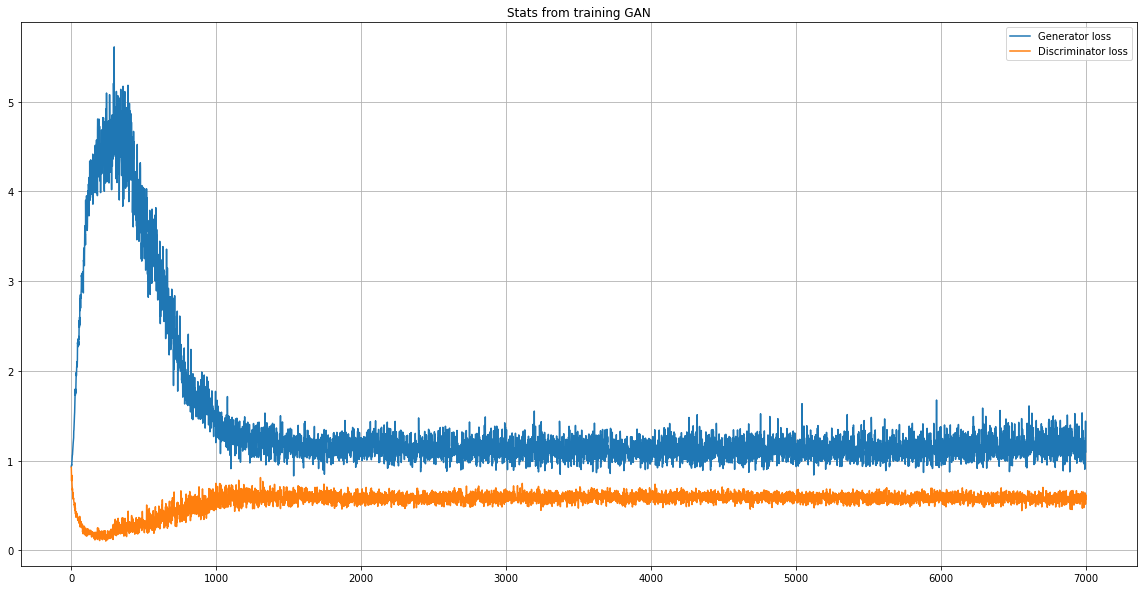

In [ ]:
latent_dim = 70  
model=gan_train(completegan, generator, discriminator,lpay_dummy.values,ma_fem_dv_남성_dummy.values,ma_fem_dv_여성_dummy.values, # 이거롤 model로 빼고
          ages_20대_dummy.values,ages_30대_dummy.values,ages_40대_dummy.values,ages_50대_dummy.values,ages_60대이상_dummy.values,
          buy_std,baby,beauty,culture,electronic,etc,fashion,food,health,home,pet,travel,redday,midnight,daybreak,morning,midday,
          twilight,nsi,ilu,rfm,latent_dim, n_epochs = 7000, n_batch = 63, n_eval = 200)

**Generating Data**

In [ ]:
a="buy_std baby beauty culture electronic etc fashion food health home pet travel redday midnight daybreak morning midday twilight nsi ilu rfm"

noise = np.random.normal(0, 1, (4000, 70))  
generated_mixed_data = generator.predict(noise)  
columns=list(lpay_dummy.columns)+list(ma_fem_dv_남성_dummy.columns)+list(ma_fem_dv_여성_dummy.columns)+list(ages_20대_dummy.columns)+list(ages_30대_dummy.columns)+list(ages_40대_dummy.columns)+list(ages_50대_dummy.columns)+list(ages_60대이상_dummy.columns)+a.split()
mixed_gen_df = pd.DataFrame(data = generated_mixed_data, columns = columns)  
mixed_gen_df.iloc[:,:-20]=np.round(mixed_gen_df.iloc[:,:-20])

In [ ]:
mixed_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lpay_0          4000 non-null   float32
 1   lpay_1          4000 non-null   float32
 2   ma_fem_dv_남성_0  4000 non-null   float32
 3   ma_fem_dv_남성_1  4000 non-null   float32
 4   ma_fem_dv_여성_0  4000 non-null   float32
 5   ma_fem_dv_여성_1  4000 non-null   float32
 6   ages_20대_0      4000 non-null   float32
 7   ages_20대_1      4000 non-null   float32
 8   ages_30대_0      4000 non-null   float32
 9   ages_30대_1      4000 non-null   float32
 10  ages_40대_0      4000 non-null   float32
 11  ages_40대_1      4000 non-null   float32
 12  ages_50대_0      4000 non-null   float32
 13  ages_50대_1      4000 non-null   float32
 14  ages_60대 이상_0   4000 non-null   float32
 15  ages_60대 이상_1   4000 non-null   float32
 16  buy_std         4000 non-null   float32
 17  baby            4000 non-null   f

In [ ]:
# Getting Back Categorical Data in Original_Format from Dummies
lpay_filter_col = [col for col in mixed_gen_df if col.startswith('lpay')]  
lpay=mixed_gen_df[lpay_filter_col]   
lpay= pd.get_dummies(lpay).idxmax(1)  
lpay= lpay.replace('lpay_', '', regex=True)  
df_generated_data = pd.DataFrame()   
df_generated_data['lpay']=lpay

ma_fem_dv_남성_filter_col = [col for col in mixed_gen_df if col.startswith('ma_fem_dv_남성')]  
ma_fem_dv_남성=mixed_gen_df[ma_fem_dv_남성_filter_col]   
ma_fem_dv_남성= pd.get_dummies(ma_fem_dv_남성).idxmax(1)  
ma_fem_dv_남성= ma_fem_dv_남성.replace('ma_fem_dv_남성_', '', regex=True)  
df_generated_data['ma_fem_dv_남성']=ma_fem_dv_남성 

ma_fem_dv_여성_filter_col = [col for col in mixed_gen_df if col.startswith('ma_fem_dv_여성')]  
ma_fem_dv_여성=mixed_gen_df[ma_fem_dv_여성_filter_col]   
ma_fem_dv_여성= pd.get_dummies(ma_fem_dv_여성).idxmax(1)  
ma_fem_dv_여성= ma_fem_dv_여성.replace('ma_fem_dv_여성_', '', regex=True)  
df_generated_data['ma_fem_dv_여성']=ma_fem_dv_여성 

ages_20대_filter_col = [col for col in mixed_gen_df if col.startswith('ages_20대')]  
ages_20대=mixed_gen_df[ages_20대_filter_col]   
ages_20대= pd.get_dummies(ages_20대).idxmax(1)  
ages_20대= ages_20대.replace('ages_20대_', '', regex=True)  
df_generated_data['ages_20대']=ages_20대  

ages_30대_filter_col = [col for col in mixed_gen_df if col.startswith('ages_30대')]  
ages_30대=mixed_gen_df[ages_30대_filter_col]   
ages_30대= pd.get_dummies(ages_30대).idxmax(1)  
ages_30대= ages_30대.replace('ages_30대_', '', regex=True)  
df_generated_data['ages_30대']=ages_30대  

ages_40대_filter_col = [col for col in mixed_gen_df if col.startswith('ages_40대')]  
ages_40대=mixed_gen_df[ages_40대_filter_col]   
ages_40대= pd.get_dummies(ages_40대).idxmax(1)  
ages_40대= ages_40대.replace('ages_40대_', '', regex=True)  
df_generated_data['ages_40대']=ages_40대    

ages_50대_filter_col = [col for col in mixed_gen_df if col.startswith('ages_50대')]  
ages_50대=mixed_gen_df[ages_50대_filter_col]   
ages_50대= pd.get_dummies(ages_50대).idxmax(1)  
ages_50대= ages_50대.replace('ages_50대_', '', regex=True)  
df_generated_data['ages_50대']=ages_50대    

ages_60대이상_filter_col = [col for col in mixed_gen_df if col.startswith('ages_60대 이상')]  
ages_60대이상=mixed_gen_df[ages_60대이상_filter_col]   
ages_60대이상= pd.get_dummies(ages_60대이상).idxmax(1)  
ages_60대이상= ages_60대이상.replace('ages_60대 이상_', '', regex=True)  
df_generated_data['ages_60대 이상']=ages_60대이상
  
  

df_generated_data[['buy_std', '대대분류_Baby', '대대분류_Beauty', '대대분류_Culture','대대분류_Electronic', '대대분류_Etc', '대대분류_Fashion', '대대분류_Food',
                   '대대분류_Health', '대대분류_Home', '대대분류_Pet', '대대분류_Travel', 'RedDay','TD_Midnight', 'TD_Daybreak', 'TD_Morning', 'TD_Midday', 
                   'TD_Twilight', 'NSI_beta', 'ILU_beta','RFM']]=mixed_gen_df[['buy_std', 'baby', 'beauty', 'culture', 'electronic', 'etc', 'fashion', 'food', 'health', 'home', 'pet' ,'travel', 'redday' ,'midnight' ,'daybreak' ,'morning', 'midday' ,'twilight', 'nsi', 'ilu','rfm']]  
  
df_generated_data['target']=1


In [ ]:
df_generated_data

,lpay,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,buy_std,대대분류_Baby,...,RedDay,TD_Midnight,TD_Daybreak,TD_Morning,TD_Midday,TD_Twilight,NSI_beta,ILU_beta,RFM,target
0,0,0,1,0,0,0,0,1,0.0,0.593244,...,0.373041,0.020897,0.000571,0.027964,0.868967,0.028409,0.897415,0.427756,0.082541,1
1,0,0,1,0,1,0,0,0,0.0,0.002311,...,0.556741,0.196437,0.000252,0.002868,0.065435,0.869589,0.008678,0.028883,0.674654,1
2,0,0,1,0,1,0,0,0,0.0,0.002047,...,0.661946,0.020501,0.000859,0.660898,0.118468,0.195947,0.065494,0.696359,0.008109,1
3,1,1,0,0,0,0,0,1,0.0,0.002901,...,0.599660,0.020893,0.000116,0.323236,0.688054,0.120687,0.814333,0.442252,0.062468,1
4,0,0,1,1,0,0,0,0,0.0,0.002057,...,0.037725,0.469541,0.059829,0.013684,0.368121,0.167285,0.019565,0.004980,0.017750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,0,1,0,0,1,0,0,0.0,0.114178,...,0.209485,0.027859,0.005969,0.176811,0.413896,0.274199,0.212407,0.016663,0.673346,1
3996,0,1,0,0,0,1,0,0,0.0,0.073442,...,0.658859,0.091175,0.000836,0.002703,0.534298,0.376531,0.270566,0.500058,0.037898,1
3997,0,0,1,0,0,0,0,1,0.0,0.000484,...,0.240020,0.013393,0.000182,0.198271,0.397588,0.392051,0.254204,0.354130,0.283102,1
3998,0,0,1,0,1,0,0,0,0.0,0.006869,...,0.492204,0.007726,0.000038,0.024860,0.650844,0.440627,0.070372,0.012471,0.356471,1


In [ ]:
df=data_minority_data_withouttv
df.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM
3,2961.172816,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,...,0,1,0,0,0,1,0,22.334630,3.926351,13.113916
4,424.264069,0.000000,0.000000,0.500000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,...,1,0,0,0,1,0,0,0.000000,2.964227,13.113916
9,24782.290073,0.131148,0.008197,0.024590,0.0,0.0,0.016393,0.639344,0.032787,0.147541,...,0,1,0,0,1,0,0,5.378422,1.183987,29.724455
12,88622.794455,0.000000,0.000000,0.333333,0.0,0.0,0.083333,0.416667,0.166667,0.000000,...,1,0,1,0,0,0,0,27.411242,2.732195,16.905498
15,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,1,0,0.000000,0.000000,13.113916


In [ ]:
df_order = df[df_generated_data.columns[:-1]]
print(df_order.columns)
print("\n")
print(df_generated_data.columns[:-1])

Index(['lpay', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대',
       'ages_40대', 'ages_50대', 'ages_60대 이상', 'buy_std', '대대분류_Baby',
       '대대분류_Beauty', '대대분류_Culture', '대대분류_Electronic', '대대분류_Etc',
       '대대분류_Fashion', '대대분류_Food', '대대분류_Health', '대대분류_Home', '대대분류_Pet',
       '대대분류_Travel', 'RedDay', 'TD_Midnight', 'TD_Daybreak', 'TD_Morning',
       'TD_Midday', 'TD_Twilight', 'NSI_beta', 'ILU_beta', 'RFM'],
      dtype='object')


Index(['lpay', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대',
       'ages_40대', 'ages_50대', 'ages_60대 이상', 'buy_std', '대대분류_Baby',
       '대대분류_Beauty', '대대분류_Culture', '대대분류_Electronic', '대대분류_Etc',
       '대대분류_Fashion', '대대분류_Food', '대대분류_Health', '대대분류_Home', '대대분류_Pet',
       '대대분류_Travel', 'RedDay', 'TD_Midnight', 'TD_Daybreak', 'TD_Morning',
       'TD_Midday', 'TD_Twilight', 'NSI_beta', 'ILU_beta', 'RFM'],
      dtype='object')


In [ ]:
min_list = []
max_list = []
for i in df_order.columns:
  min_list.append(min(df_order[i]))
  max_list.append(max(df_order[i]))

In [ ]:
df_plz = df_generated_data.copy()
df_plz.shape[0]

4000

In [ ]:
df_generated_data.head()

,lpay,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,buy_std,대대분류_Baby,...,RedDay,TD_Midnight,TD_Daybreak,TD_Morning,TD_Midday,TD_Twilight,NSI_beta,ILU_beta,RFM,target
0,0,0,1,0,0,0,0,1,0.0,0.593244,...,0.373041,0.020897,0.000571,0.027964,0.868967,0.028409,0.897415,0.427756,0.082541,1
1,0,0,1,0,1,0,0,0,0.0,0.002311,...,0.556741,0.196437,0.000252,0.002868,0.065435,0.869589,0.008678,0.028883,0.674654,1
2,0,0,1,0,1,0,0,0,0.0,0.002047,...,0.661946,0.020501,0.000859,0.660898,0.118468,0.195947,0.065494,0.696359,0.008109,1
3,1,1,0,0,0,0,0,1,0.0,0.002901,...,0.599660,0.020893,0.000116,0.323236,0.688054,0.120687,0.814333,0.442252,0.062468,1
4,0,0,1,1,0,0,0,0,0.0,0.002057,...,0.037725,0.469541,0.059829,0.013684,0.368121,0.167285,0.019565,0.004980,0.017750,1


In [ ]:
df_generated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lpay             4000 non-null   object 
 1   ma_fem_dv_남성     4000 non-null   object 
 2   ma_fem_dv_여성     4000 non-null   object 
 3   ages_20대         4000 non-null   object 
 4   ages_30대         4000 non-null   object 
 5   ages_40대         4000 non-null   object 
 6   ages_50대         4000 non-null   object 
 7   ages_60대 이상      4000 non-null   object 
 8   buy_std          4000 non-null   float32
 9   대대분류_Baby        4000 non-null   float32
 10  대대분류_Beauty      4000 non-null   float32
 11  대대분류_Culture     4000 non-null   float32
 12  대대분류_Electronic  4000 non-null   float32
 13  대대분류_Etc         4000 non-null   float32
 14  대대분류_Fashion     4000 non-null   float32
 15  대대분류_Food        4000 non-null   float32
 16  대대분류_Health      4000 non-null   float32
 17  대대분류_Home     

In [ ]:
df_generated_data.iloc[:, df_generated_data.columns.str.contains("ma|ages|lpay")] = df_generated_data.iloc[:, df_generated_data.columns.str.contains("ma|ages|lpay")].astype(float)
df_generated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lpay             4000 non-null   float64
 1   ma_fem_dv_남성     4000 non-null   float64
 2   ma_fem_dv_여성     4000 non-null   float64
 3   ages_20대         4000 non-null   float64
 4   ages_30대         4000 non-null   float64
 5   ages_40대         4000 non-null   float64
 6   ages_50대         4000 non-null   float64
 7   ages_60대 이상      4000 non-null   float64
 8   buy_std          4000 non-null   float32
 9   대대분류_Baby        4000 non-null   float32
 10  대대분류_Beauty      4000 non-null   float32
 11  대대분류_Culture     4000 non-null   float32
 12  대대분류_Electronic  4000 non-null   float32
 13  대대분류_Etc         4000 non-null   float32
 14  대대분류_Fashion     4000 non-null   float32
 15  대대분류_Food        4000 non-null   float32
 16  대대분류_Health      4000 non-null   float32
 17  대대분류_Home     

In [ ]:
max_list = list(map(float, max_list))
max_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 6393749.067435579,
 0.8846153846153846,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 44.57404192923664,
 28.0648494614448,
 60.76093507466985]

In [ ]:
min_list = list(map(float, min_list))
min_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 13.113916423882417]

In [ ]:
df_plz = df_generated_data.copy()
for i in range(df_plz.shape[1]-1):
  df_plz.iloc[:, i] = df_generated_data.iloc[:, i]*(max_list[i]-min_list[i])+min_list[i]
df_plz.head()

,lpay,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,buy_std,대대분류_Baby,...,RedDay,TD_Midnight,TD_Daybreak,TD_Morning,TD_Midday,TD_Twilight,NSI_beta,ILU_beta,RFM,target
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.524793,...,0.373041,0.020897,0.000571,0.027964,0.868967,0.028409,40.001411,12.004921,17.046768,1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002044,...,0.556741,0.196437,0.000252,0.002868,0.065435,0.869589,0.386804,0.810589,45.259155,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001811,...,0.661946,0.020501,0.000859,0.660898,0.118468,0.195947,2.919339,19.543203,13.500265,1
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002567,...,0.599660,0.020893,0.000116,0.323236,0.688054,0.120687,36.298096,12.411745,16.090322,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001820,...,0.037725,0.469541,0.059829,0.013684,0.368121,0.167285,0.872069,0.139762,13.959648,1


In [ ]:
df_plz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lpay             4000 non-null   float64
 1   ma_fem_dv_남성     4000 non-null   float64
 2   ma_fem_dv_여성     4000 non-null   float64
 3   ages_20대         4000 non-null   float64
 4   ages_30대         4000 non-null   float64
 5   ages_40대         4000 non-null   float64
 6   ages_50대         4000 non-null   float64
 7   ages_60대 이상      4000 non-null   float64
 8   buy_std          4000 non-null   float32
 9   대대분류_Baby        4000 non-null   float32
 10  대대분류_Beauty      4000 non-null   float32
 11  대대분류_Culture     4000 non-null   float32
 12  대대분류_Electronic  4000 non-null   float32
 13  대대분류_Etc         4000 non-null   float32
 14  대대분류_Fashion     4000 non-null   float32
 15  대대분류_Food        4000 non-null   float32
 16  대대분류_Health      4000 non-null   float32
 17  대대분류_Home     

In [ ]:
GAN_x=df_plz.loc[:,df_plz.columns != 'target']
GAN_y=df_plz.loc[:,'target']

In [ ]:
GAN_x

,lpay,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,buy_std,대대분류_Baby,...,대대분류_Travel,RedDay,TD_Midnight,TD_Daybreak,TD_Morning,TD_Midday,TD_Twilight,NSI_beta,ILU_beta,RFM
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.524793,...,0.000153,0.373041,0.020897,0.000571,0.027964,0.868967,0.028409,40.001411,12.004921,17.046768
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.002044,...,0.000189,0.556741,0.196437,0.000252,0.002868,0.065435,0.869589,0.386804,0.810589,45.259155
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001811,...,0.002991,0.661946,0.020501,0.000859,0.660898,0.118468,0.195947,2.919339,19.543203,13.500265
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002567,...,0.002167,0.599660,0.020893,0.000116,0.323236,0.688054,0.120687,36.298096,12.411745,16.090322
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001820,...,0.000041,0.037725,0.469541,0.059829,0.013684,0.368121,0.167285,0.872069,0.139762,13.959648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.101003,...,0.023582,0.209485,0.027859,0.005969,0.176811,0.413896,0.274199,9.467849,0.467658,45.196869
3996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.064968,...,0.002281,0.658859,0.091175,0.000836,0.002703,0.534298,0.376531,12.060224,14.034044,14.919659
3997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000428,...,0.000218,0.240020,0.013393,0.000182,0.198271,0.397588,0.392051,11.330883,9.938615,26.602898
3998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006076,...,0.000383,0.492204,0.007726,0.000038,0.024860,0.650844,0.440627,3.136773,0.349993,30.098677


In [ ]:
GAN_y=pd.DataFrame(GAN_y,columns=y_train.columns)
GAN_y

,target
0,1
1,1
2,1
3,1
4,1
...,...
3995,1
3996,1
3997,1
3998,1


In [ ]:
import pandas as pd 

X_train=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_train.csv')
y_train=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_train.csv')

In [ ]:
x_train_over=pd.concat([X_train,GAN_x],axis=0)
y_train_over=pd.concat([y_train,GAN_y],axis=0)

In [ ]:
y_train_over

,target
0,0
1,0
2,0
3,1
4,1
...,...
3995,1
3996,1
3997,1
3998,1


In [ ]:
print(y_train_over.value_counts())

target
0         8300
1         5343
dtype: int64


In [ ]:
# Oversampling된 Train and Test Data 적용 

x_train_over.to_csv("/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_train_over.csv",index=False)
y_train_over.to_csv("/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_train_over.csv",index=False)



# DNN ( Cross Validation & Model Evaluation ) 

**GAN을 통해 Oversampling이 적용된 Train데이터의 분포 확인**

In [5]:
import pandas as pd 

X_train_over=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_train_over.csv')
y_train_over=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_train_over.csv')
X_valid=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_valid.csv')
y_valid=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_valid.csv')
X_test=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/X_test.csv')
y_test=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_test.csv')

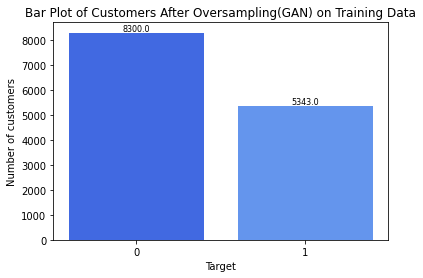

In [ ]:
xlabel=['0','1']
plt.title('Bar Plot of Customers After Oversampling(GAN) on Training Data')
plt.xlabel('Target')
plt.ylabel('Number of customers') 
bar=plt.bar(xlabel, y_train_over.value_counts(),color=['royalblue','cornflowerblue'])

for rect in bar: 
  height=rect.get_height() 
  plt.text(rect.get_x()+rect.get_width()/2.0,height,'%.1f' %height, ha='center',va='bottom',size=8)

plt.show()

In [6]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [7]:
np.random.seed(1) 
tf.random.set_seed(1) 

In [8]:
print(X_train_over.shape,X_valid.shape,X_test.shape)

(13643, 29) (9644, 29) (8266, 29)


In [9]:
print(y_train_over.shape,y_valid.shape,y_test.shape)

(13643, 1) (9644, 1) (8266, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler 

scaler=MinMaxScaler() 

x_train_s=scaler.fit_transform(X_train_over) 
x_valid_s=scaler.transform(X_valid)
x_test_s=scaler.transform(X_test) 

x_train_s=pd.DataFrame(x_train_s,columns=X_train_over.columns)
x_valid_s=pd.DataFrame(x_valid_s,columns=X_valid.columns)
x_test_s=pd.DataFrame(x_test_s,columns=X_test.columns)

In [11]:
print(x_train_s.shape,x_valid_s.shape,x_test_s.shape)

(13643, 29) (9644, 29) (8266, 29)


In [12]:
print(y_train_over.shape,y_valid.shape,y_test.shape)

(13643, 1) (9644, 1) (8266, 1)


**Hyperparameter Tuning**

In [13]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Dropout

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from scikeras.wrappers import KerasClassifier 
from sklearn.model_selection import GridSearchCV 
import numpy as np 

# Function to create model, required for KerasClassifier 

def create_model(optimizer='rmsprop',init='glorot_uniform'):

  model=Sequential()
  model.add(Dense(units=32,activation='relu',kernel_initializer=init,input_shape=(X_train_over.shape[1],)))
  model.add(Dropout(0.3))
  model.add(Dense(units=16,activation='relu',kernel_initializer=init))
  model.add(Dropout(0.1))
  model.add(Dense(units=16,activation='relu',kernel_initializer=init))
  model.add(Dropout(0.1))
  model.add(Dense(units=8,activation='relu',kernel_initializer=init))
  model.add(Dense(units=1,activation='sigmoid'))

  # Compile Model 
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

  return model 

In [15]:
from sklearn.metrics import f1_score, accuracy_score

# split into input (X) and output (Y) variables 
X=X_train_over 
Y=y_train_over

# create model 
model=KerasClassifier(model=create_model,verbose=0) 
print(model.get_params().keys()) 

# Grid Search Epochs, Batch Size and Optimizer 
optimizers=['rmsprop','adam','adagrad']
init=['glorot_uniform','he_normal','uniform','normal']

param_grid=dict(optimizer=optimizers,model__init=init) 

# Cross Validation 
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=3 ) 
grid_result=grid.fit(X,Y) 

#summarize results 
scores_df=pd.DataFrame(grid.cv_results_)
print(scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score',
                 'split2_test_score']])
print('GridSearchCV 최적 파라미터:',grid.best_score_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid.best_score_))


dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])
                                               params  mean_test_score  \
0   {'model__init': 'glorot_uniform', 'optimizer':...         0.901715   
1   {'model__init': 'glorot_uniform', 'optimizer':...         0.901568   
2   {'model__init': 'glorot_uniform', 'optimizer':...         0.901715   
3   {'model__init': 'he_normal', 'optimizer': 'rms...         0.901348   
4   {'model__init': 'he_normal', 'optimizer': 'adam'}         0.901715   
5   {'model__init': 'he_normal', 'optimizer': 'ada...         0.901715   
6   {'model__init': 'uniform', 'optimizer': 'rmspr...         0.901275   
7     {'model__init': 'uniform', 'optimizer': 'adam'}         0.901128   
8   {'model__init': 'uniform', 'optimizer': 'adagr...         0.901128   
9   {'model__init': 'normal', 

**Epoch, Batch_size, Learning Rate 지정**

In [16]:
learning_rate=0.001
N_EPOCHS=10
N_BATCH=128

N_TRAIN=x_train_s.shape[0]
N_VALID=x_valid_s.shape[0]
N_TEST=x_test_s.shape[0]

N_FEATURES=x_train_s.shape[1]

In [17]:
print(N_TRAIN,N_VALID,N_TEST)

13643 9644 8266


In [18]:
train_over_dataset=tf.data.Dataset.from_tensor_slices((x_train_s,y_train_over)).shuffle(N_TRAIN).batch(N_BATCH,drop_remainder=True).repeat()
valid_dataset=tf.data.Dataset.from_tensor_slices((x_valid_s,y_valid)).batch(N_BATCH)
test_dataset=tf.data.Dataset.from_tensor_slices((x_test_s,y_test)).batch(N_BATCH)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Dropout
from sklearn.metrics import f1_score, accuracy_score

# 모델 생성 


def fin_model():

  model=Sequential()
  model.add(Dense(units=32,activation='relu',kernel_initializer='normal',input_shape=(X_train_over.shape[1],)))
  model.add(Dropout(0.3))
  model.add(Dense(units=16,activation='relu',kernel_initializer='normal'))
  model.add(Dropout(0.1))
  model.add(Dense(units=16,activation='relu',kernel_initializer='normal'))
  model.add(Dropout(0.1))
  model.add(Dense(units=8,activation='relu',kernel_initializer='normal'))
  model.add(Dense(units=1,activation='sigmoid'))

  return model 

In [20]:
# Model Compile 

model=fin_model()

# loss = 'categorical_crossentropy', or 'sparse_categorical_crossentropy', 'binary_crossentropy'
# tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 32)                960       
                                                                 
 dropout_111 (Dropout)       (None, 32)                0         
                                                                 
 dense_186 (Dense)           (None, 16)                528       
                                                                 
 dropout_112 (Dropout)       (None, 16)                0         
                                                                 
 dense_187 (Dense)           (None, 16)                272       
                                                                 
 dropout_113 (Dropout)       (None, 16)                0         
                                                                 
 dense_188 (Dense)           (None, 8)               

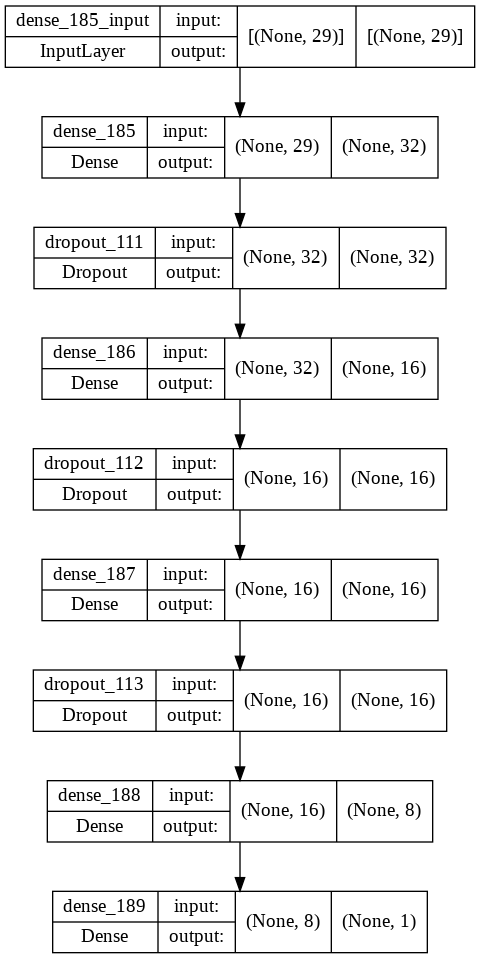

In [22]:
from tensorflow.keras.utils import plot_model 

plot_model(model,show_shapes=True)

In [23]:
# step은 iteration과 동일한 개념으로 생각할 수 있다. 

train_steps=N_TRAIN//N_BATCH
valid_steps=int(np.ceil(N_VALID/N_BATCH))

In [24]:
print(train_steps)
print(valid_steps)

106
76


In [25]:
print(train_over_dataset)
print(valid_dataset)

<RepeatDataset element_spec=(TensorSpec(shape=(128, 29), dtype=tf.float64, name=None), TensorSpec(shape=(128, 1), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 29), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>


In [26]:
history=model.fit(train_over_dataset,
                  epochs=10,
                  steps_per_epoch=train_steps,
                  validation_data=valid_dataset,
                  validation_steps=valid_steps)


Epoch 1/10
106/106 [==============================] - 2s 6ms/step - loss: 0.6491 - accuracy: 0.6066 - val_loss: 0.4557 - val_accuracy: 0.8606
Epoch 2/10
106/106 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.7336 - val_loss: 0.3711 - val_accuracy: 0.8190
Epoch 3/10
106/106 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7840 - val_loss: 0.3943 - val_accuracy: 0.7987
Epoch 4/10
106/106 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7964 - val_loss: 0.4255 - val_accuracy: 0.7897
Epoch 5/10
106/106 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8027 - val_loss: 0.3682 - val_accuracy: 0.8298
Epoch 6/10
106/106 [==============================] - 0s 4ms/step - loss: 0.4313 - accuracy: 0.8090 - val_loss: 0.4062 - val_accuracy: 0.8099
Epoch 7/10
106/106 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.8104 - val_loss: 0.3927 - val_accuracy: 0.8167
Epoch 

In [28]:
import pickle
import joblib
pickle.dump(model, open('/content/drive/Shareddrives/엘포인트 홧팅/최종/DNN_model2.pkl', 'wb'))

In [35]:
import pickle
import joblib
model3 = pickle.load(open('/content/drive/Shareddrives/엘포인트 홧팅/최종/DNN_model2.pkl', 'rb'))

In [36]:
# pkl 작동 여부 확인 완료
model3.evaluate(x_test_s,y_test,verbose=2)

259/259 - 1s - loss: 0.4049 - accuracy: 0.8056 - 675ms/epoch - 3ms/step


[0.4048754870891571, 0.8055891394615173]

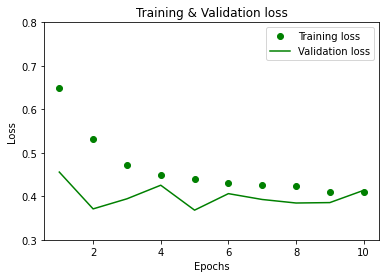

In [32]:
# 훈련과 검증의 손실 그리기 

import matplotlib.pyplot as plt
%matplotlib inline 

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'go',label='Training loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Training & Validation loss')
plt.ylim(0.3,0.8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

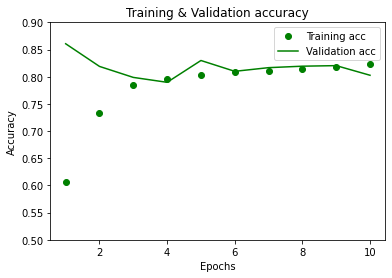

In [33]:
# 훈련, 검증 정확도 그리기 

plt.clf() # 그래프 초기화
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

plt.plot(epochs,acc,'go',label='Training acc')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5,0.9)
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test_s,y_test,verbose=2)

259/259 - 0s - loss: 0.4049 - accuracy: 0.8056 - 338ms/epoch - 1ms/step


[0.4048754870891571, 0.8055891394615173]

In [ ]:
from sklearn.metrics import f1_score 

thre_set=[0.4,0.45,0.5,0.55,0.6,0.65,0.7]
scores=[]

for thre in thre_set:

  y_pred1=model.predict(x_test_s)
  pred=np.where(y_pred1>=thre,1,0)
  s=f1_score(y_test,pred)
  print('score:',s)

  scores.append(s) 

score: 0.46991073999424127
score: 0.4771822358346095
score: 0.4770582492678165
score: 0.4796971782518927
score: 0.48238285506719947
score: 0.4736639753940792
score: 0.46906591184795793


In [ ]:
y_pred_fin=model.predict(x_test_s) 
fin_pred=np.where(y_pred_fin>0.65,1,0)
fin_score=f1_score(y_test,fin_pred) 
print(fin_score)

0.4736639753940792


In [ ]:
fin_pred=pd.DataFrame(fin_pred)
fin_pred.columns=['target']

In [ ]:
fin_pred

,target
0,0
1,1
2,0
3,0
4,0
...,...
8261,0
8262,0
8263,0
8264,0


In [ ]:
fin_pred.value_counts()

target
0         6816
1         1450
dtype: int64

In [ ]:
fin_pred.to_csv("/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/pred_DNN.csv",index=False)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,fin_pred)
print(cf)

[[6281  834]
 [ 535  616]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

p = precision_score(y_test,fin_pred)
print(p)
r = recall_score(y_test,fin_pred)
print(r)
f1 = f1_score(y_test,fin_pred)
print(f1)

0.42482758620689653
0.5351867940920938
0.4736639753940792


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

fin_pred=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/pred_DNN.csv')
y_test=pd.read_csv('/content/drive/Shareddrives/엘포인트 홧팅/데이터/전처리6/y_test.csv')

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
import matplotlib.pyplot as plt

fin_pred=fin_pred.astype(str) 
y_test=y_test.astype(str)

In [ ]:
from sklearn.metrics import classification_report 

target_names=['0','1']
print(classification_report(y_test,fin_pred,target_names=target_names))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7115
           1       0.42      0.54      0.47      1151

    accuracy                           0.83      8266
   macro avg       0.67      0.71      0.69      8266
weighted avg       0.85      0.83      0.84      8266



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,fin_pred)
print(cf)

[[6281  834]
 [ 535  616]]
